In [23]:
# binary and multi-class Keras

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # need one hot encoded matrix for neural networks

import matplotlib.pyplot as plt
%matplotlib inline

##### Log Loss function
−(y*log(p)+(1−y)log(1−p))

In [4]:
y = 1 #malignant tumor
p = 0.01  # probability

- (y * np.log(p) + (1 - y) * np.log(1 - p))

4.605170185988091

In [6]:
y = 0 #benign tumor
p = 0.80  # probability

- (y * np.log(p) + (1 - y) * np.log(1 - p))

1.6094379124341005

In [7]:
data = load_breast_cancer()

In [8]:
#invert y so that 1 is malignant and 0 is benign

y = 1 - data.target
X = data.data

In [15]:
print('Baseline accuracy is', 1 - y.mean())


Baseline accuracy is 0.6274165202108963


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [27]:
model = Sequential()

# 30 features so start with one layer with 30 neurons
model.add(Dense(60, input_dim = X.shape[1], activation = 'relu'))
model.add(Dropout(0.5))  # dropping 50% of the above neurons into next layer - good for biased test sets
model.add(Dense(30, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(15, input_dim = X.shape[1], activation = 'relu'))

# add output layer - for binary classification: one neuron and loss function is sigmoid (log loss below as a probability)
model.add(Dense(1, activation = 'sigmoid')) # always a must have for a binary classification

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])  # binary cross entropy will always be your loss for binary classification

history = model.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test), epochs = 20, verbose = 0)

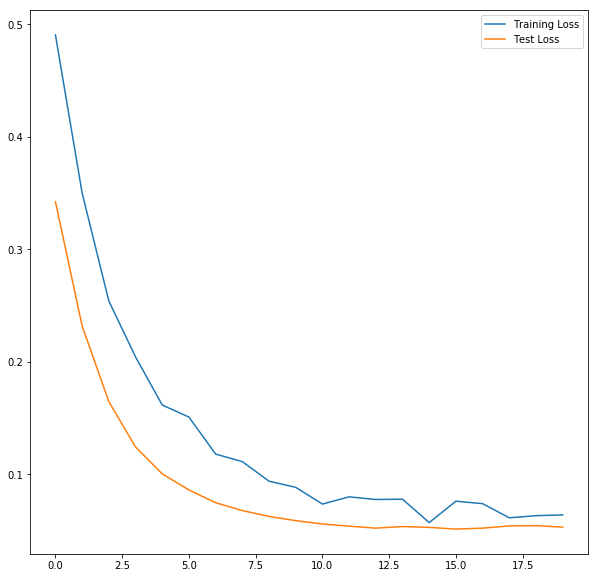

In [28]:
plt.figure(figsize = (10,10)) # set how large the chart is
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [29]:
model.predict_classes(X_test_sc)

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [30]:
model.predict_proba(X_test_sc) # to make predictions

array([[9.99911070e-01],
       [3.64674558e-03],
       [9.99725044e-01],
       [2.18444605e-08],
       [3.47579904e-02],
       [3.27890832e-03],
       [3.90969508e-04],
       [1.76461844e-03],
       [1.89349037e-02],
       [1.17059713e-02],
       [9.89925861e-01],
       [9.90611017e-01],
       [3.58836632e-03],
       [6.81385864e-05],
       [8.90827000e-01],
       [1.03052380e-03],
       [1.83445995e-03],
       [7.42509947e-05],
       [9.99080297e-03],
       [9.92717266e-01],
       [7.06823426e-04],
       [1.26229338e-02],
       [1.31664965e-02],
       [9.99998689e-01],
       [9.99994874e-01],
       [9.96286273e-01],
       [9.99999881e-01],
       [3.02275806e-03],
       [1.22578464e-01],
       [9.57335124e-06],
       [8.28542933e-03],
       [9.99955773e-01],
       [5.93485730e-03],
       [9.88821507e-01],
       [1.22917190e-04],
       [1.54124093e-04],
       [1.01667400e-02],
       [9.99999881e-01],
       [1.37583655e-03],
       [1.00000000e+00],


# Multi-class Classification - dog, cat, fish or 3 species of irises

In [36]:
X = data.data
y = to_categorical(data.target)  # needed for neural networks for multi class problems because of loss functions

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [38]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [40]:
model = Sequential()

# 4 features
model.add(Dense(4, input_dim = X_train.shape[1], activation = 'relu'))

# regression - 1 neuron, no activation
# binary class - 1 neuron, sigmoid activation
# for multi-class need same # of neurons for classes so 3 in this example and activation of softmax
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test), epochs = 20, verbose = 1)

ValueError: Error when checking target: expected dense_31 to have shape (3,) but got array with shape (2,)